In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

In [2]:
distance_to_obstacle = ctrl.Antecedent(np.arange(0, 101, 1), 'distance_to_obstacle')
angle_to_obstacle = ctrl.Antecedent(np.arange(-180, 181, 1), 'angle_to_obstacle')
angle_to_target = ctrl.Antecedent(np.arange(-180, 181, 1), 'angle_to_target')

speed_change = ctrl.Consequent(np.arange(-100, 101, 1), 'speed_change')
heading_change = ctrl.Consequent(np.arange(-45, 46, 1), 'heading_change')


In [3]:
distance_to_obstacle['close'] = fuzz.trimf(distance_to_obstacle.universe, [0, 0, 30])
distance_to_obstacle['medium'] = fuzz.trimf(distance_to_obstacle.universe, [20, 50, 80])
distance_to_obstacle['far'] = fuzz.trimf(distance_to_obstacle.universe, [50, 100, 100])

angle_to_obstacle['neg_big'] = fuzz.trimf(angle_to_obstacle.universe, [-180, -180, -120])
angle_to_obstacle['neg_med'] = fuzz.trimf(angle_to_obstacle.universe, [-120, -90, -30])
angle_to_obstacle['neg_small'] = fuzz.trimf(angle_to_obstacle.universe, [-30, -10, 0])
angle_to_obstacle['pos_small'] = fuzz.trimf(angle_to_obstacle.universe, [0, 10, 30])
angle_to_obstacle['pos_med'] = fuzz.trimf(angle_to_obstacle.universe, [30, 90, 120])
angle_to_obstacle['pos_big'] = fuzz.trimf(angle_to_obstacle.universe, [120, 180, 180])

angle_to_target['neg_big'] = fuzz.trimf(angle_to_target.universe, [-180, -180, -120])
angle_to_target['neg_med'] = fuzz.trimf(angle_to_target.universe, [-120, -90, -30])
angle_to_target['neg_small'] = fuzz.trimf(angle_to_target.universe, [-30, -10, 0])
angle_to_target['zero'] = fuzz.trimf(angle_to_target.universe, [-1, 0, 1])
angle_to_target['pos_small'] = fuzz.trimf(angle_to_target.universe, [0, 10, 30])
angle_to_target['pos_med'] = fuzz.trimf(angle_to_target.universe, [30, 90, 120])
angle_to_target['pos_big'] = fuzz.trimf(angle_to_target.universe, [120, 180, 180])

speed_change['very_slow'] = fuzz.trimf(speed_change.universe, [-100, -100, -50])
speed_change['slow'] = fuzz.trimf(speed_change.universe, [-50, 0, 50])
speed_change['fast'] = fuzz.trimf(speed_change.universe, [50, 100, 100])
speed_change['very_fast'] = fuzz.trimf(speed_change.universe, [75, 100, 100])

heading_change['neg_big'] = fuzz.trimf(heading_change.universe, [-45, -45, -15])
heading_change['neg_med'] = fuzz.trimf(heading_change.universe, [-15, -10, 0])
heading_change['neg_small'] = fuzz.trimf(heading_change.universe, [-5, 0, 0])
heading_change['zero'] = fuzz.trimf(heading_change.universe, [-1, 0, 1])
heading_change['pos_small'] = fuzz.trimf(heading_change.universe, [0, 5, 15])
heading_change['pos_med'] = fuzz.trimf(heading_change.universe, [10, 15, 45])
heading_change['pos_big'] = fuzz.trimf(heading_change.universe, [15, 45, 45])


In [4]:
rule27 = ctrl.Rule(distance_to_obstacle['far'] & angle_to_obstacle['pos_big'] & angle_to_target['neg_big'], 
                   (speed_change['fast'], heading_change['neg_big']))
rule28 = ctrl.Rule(distance_to_obstacle['far'] & angle_to_obstacle['pos_big'] & angle_to_target['neg_med'], 
                   (speed_change['fast'], heading_change['neg_med']))
rule29 = ctrl.Rule(distance_to_obstacle['far'] & angle_to_obstacle['pos_big'] & angle_to_target['neg_small'], 
                   (speed_change['fast'], heading_change['neg_small']))
rule30 = ctrl.Rule(distance_to_obstacle['far'] & angle_to_obstacle['pos_big'] & angle_to_target['zero'], 
                   (speed_change['fast'], heading_change['zero']))
rule31 = ctrl.Rule(distance_to_obstacle['far'] & angle_to_obstacle['pos_big'] & angle_to_target['pos_small'], 
                   (speed_change['fast'], heading_change['pos_small']))
rule32 = ctrl.Rule(distance_to_obstacle['far'] & angle_to_obstacle['pos_big'] & angle_to_target['pos_med'], 
                   (speed_change['fast'], heading_change['pos_med']))
rule33 = ctrl.Rule(distance_to_obstacle['far'] & angle_to_obstacle['pos_big'] & angle_to_target['pos_big'], 
                   (speed_change['fast'], heading_change['pos_big']))
rule34 = ctrl.Rule(distance_to_obstacle['far'] & angle_to_obstacle['neg_big'] & angle_to_target['neg_big'], 
                   (speed_change['fast'], heading_change['neg_big']))
rule35 = ctrl.Rule(distance_to_obstacle['far'] & angle_to_obstacle['neg_big'] & angle_to_target['neg_med'], 
                   (speed_change['fast'], heading_change['neg_med']))
rule36 = ctrl.Rule(distance_to_obstacle['far'] & angle_to_obstacle['neg_big'] & angle_to_target['neg_small'], 
                   (speed_change['fast'], heading_change['neg_small']))
rule37 = ctrl.Rule(distance_to_obstacle['far'] & angle_to_obstacle['neg_big'] & angle_to_target['zero'], 
                   (speed_change['fast'], heading_change['zero']))
rule38 = ctrl.Rule(distance_to_obstacle['far'] & angle_to_obstacle['neg_big'] & angle_to_target['pos_small'], 
                   (speed_change['fast'], heading_change['pos_small']))
rule39 = ctrl.Rule(distance_to_obstacle['far'] & angle_to_obstacle['neg_big'] & angle_to_target['pos_med'], 
                   (speed_change['fast'], heading_change['pos_med']))
rule40 = ctrl.Rule(distance_to_obstacle['far'] & angle_to_obstacle['neg_big'] & angle_to_target['pos_big'], 
                   (speed_change['fast'], heading_change['pos_big']))

In [5]:
uav_ctrl_extreme = ctrl.ControlSystem([rule27, rule28, rule29, rule30, rule31, rule32, rule33, rule34, rule35, rule36, rule37, rule38, rule39, rule40])
uav_simulation_extreme = ctrl.ControlSystemSimulation(uav_ctrl_extreme)

distance_to_obstacle_value = np.random.uniform(50, 100)  
angle_to_obstacle_value = np.random.uniform(-180, 180)   
angle_to_target_value = np.random.uniform(-180, 180)     


In [8]:
for step in range(50):

    uav_simulation_extreme.input['distance_to_obstacle'] = distance_to_obstacle_value
    uav_simulation_extreme.input['angle_to_obstacle'] = angle_to_obstacle_value
    uav_simulation_extreme.input['angle_to_target'] = angle_to_target_value

    uav_simulation_extreme.compute()

    speed_change_output = uav_simulation_extreme.output.get('speed_change', None)
    heading_change_output = uav_simulation_extreme.output.get('heading_change', None)

    print(f"Korak {step + 1}:")
    print(f"  Udaljenost do prepreke: {distance_to_obstacle_value:.2f}")
    print(f"  Ugao do prepreke: {angle_to_obstacle_value:.2f}")
    print(f"  Ugao do cilja: {angle_to_target_value:.2f}")

    if speed_change_output is not None:
        print(f"  Predložena promena brzine: {speed_change_output:.2f}")
    else:
        print("  Nema izlaza za promenu brzine.")

    if heading_change_output is not None:
        print(f"  Predložena promena ugla pravca: {heading_change_output:.2f}")
    else:
        print("  Nema izlaza za promenu ugla pravca.")
    print("\n")


Korak 1:
  Udaljenost do prepreke: 63.62
  Ugao do prepreke: 170.03
  Ugao do cilja: -164.38
  Predložena promena brzine: 78.23
  Predložena promena ugla pravca: -31.94


Korak 2:
  Udaljenost do prepreke: 63.62
  Ugao do prepreke: 170.03
  Ugao do cilja: -164.38
  Predložena promena brzine: 78.23
  Predložena promena ugla pravca: -31.94


Korak 3:
  Udaljenost do prepreke: 63.62
  Ugao do prepreke: 170.03
  Ugao do cilja: -164.38
  Predložena promena brzine: 78.23
  Predložena promena ugla pravca: -31.94


Korak 4:
  Udaljenost do prepreke: 63.62
  Ugao do prepreke: 170.03
  Ugao do cilja: -164.38
  Predložena promena brzine: 78.23
  Predložena promena ugla pravca: -31.94


Korak 5:
  Udaljenost do prepreke: 63.62
  Ugao do prepreke: 170.03
  Ugao do cilja: -164.38
  Predložena promena brzine: 78.23
  Predložena promena ugla pravca: -31.94


Korak 6:
  Udaljenost do prepreke: 63.62
  Ugao do prepreke: 170.03
  Ugao do cilja: -164.38
  Predložena promena brzine: 78.23
  Predložena prom

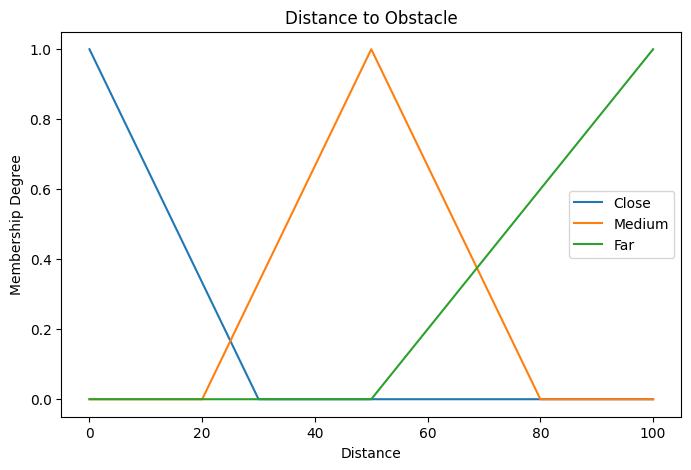

In [9]:
plt.figure(figsize=(8, 5))

plt.plot(distance_to_obstacle.universe, distance_to_obstacle['close'].mf, label='Close')
plt.plot(distance_to_obstacle.universe, distance_to_obstacle['medium'].mf, label='Medium')
plt.plot(distance_to_obstacle.universe, distance_to_obstacle['far'].mf, label='Far')

plt.title('Distance to Obstacle')
plt.xlabel('Distance')
plt.ylabel('Membership Degree')
plt.legend()
plt.show()

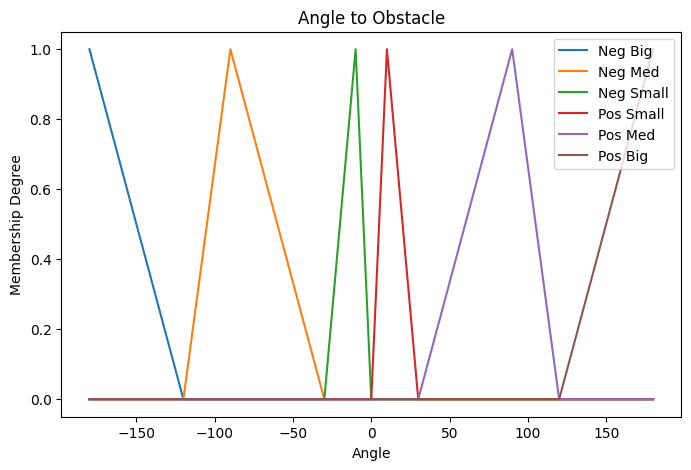

In [10]:
plt.figure(figsize=(8, 5))

plt.plot(angle_to_obstacle.universe, angle_to_obstacle['neg_big'].mf, label='Neg Big')
plt.plot(angle_to_obstacle.universe, angle_to_obstacle['neg_med'].mf, label='Neg Med')
plt.plot(angle_to_obstacle.universe, angle_to_obstacle['neg_small'].mf, label='Neg Small')
plt.plot(angle_to_obstacle.universe, angle_to_obstacle['pos_small'].mf, label='Pos Small')
plt.plot(angle_to_obstacle.universe, angle_to_obstacle['pos_med'].mf, label='Pos Med')
plt.plot(angle_to_obstacle.universe, angle_to_obstacle['pos_big'].mf, label='Pos Big')

plt.title('Angle to Obstacle')
plt.xlabel('Angle')
plt.ylabel('Membership Degree')
plt.legend()
plt.show()

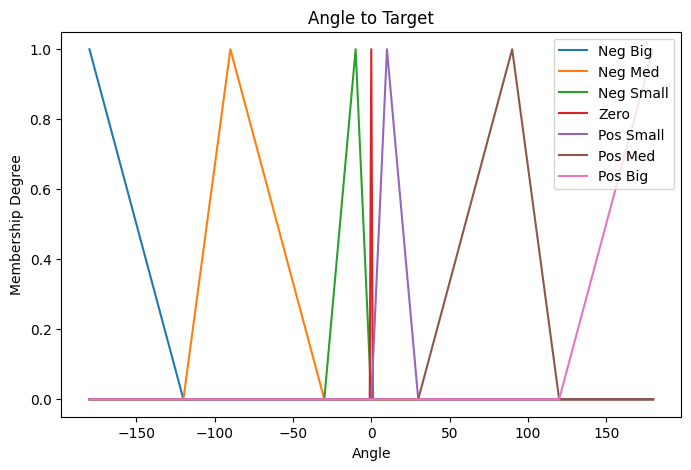

In [11]:
plt.figure(figsize=(8, 5))

plt.plot(angle_to_target.universe, angle_to_target['neg_big'].mf, label='Neg Big')
plt.plot(angle_to_target.universe, angle_to_target['neg_med'].mf, label='Neg Med')
plt.plot(angle_to_target.universe, angle_to_target['neg_small'].mf, label='Neg Small')
plt.plot(angle_to_target.universe, angle_to_target['zero'].mf, label='Zero')
plt.plot(angle_to_target.universe, angle_to_target['pos_small'].mf, label='Pos Small')
plt.plot(angle_to_target.universe, angle_to_target['pos_med'].mf, label='Pos Med')
plt.plot(angle_to_target.universe, angle_to_target['pos_big'].mf, label='Pos Big')

plt.title('Angle to Target')
plt.xlabel('Angle')
plt.ylabel('Membership Degree')
plt.legend()
plt.show()

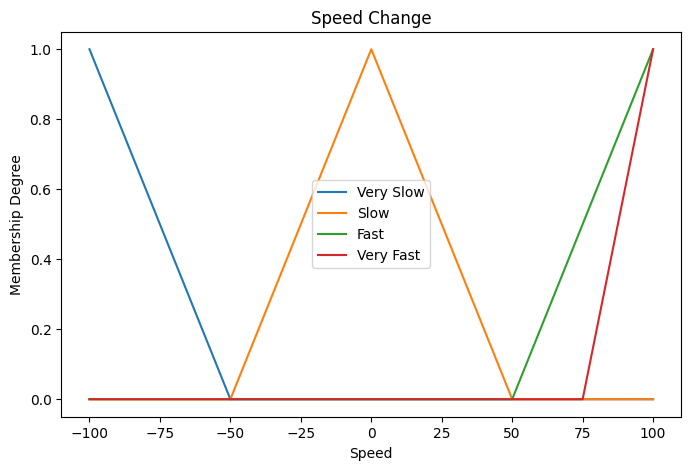

In [12]:
plt.figure(figsize=(8, 5))

plt.plot(speed_change.universe, speed_change['very_slow'].mf, label='Very Slow')
plt.plot(speed_change.universe, speed_change['slow'].mf, label='Slow')
plt.plot(speed_change.universe, speed_change['fast'].mf, label='Fast')
plt.plot(speed_change.universe, speed_change['very_fast'].mf, label='Very Fast')

plt.title('Speed Change')
plt.xlabel('Speed')
plt.ylabel('Membership Degree')
plt.legend()
plt.show()